The following attributes have been changed for the model development purposes : 

Job
1. admin. = 0
2. blue-collar = 1
3. entrepreneur = 2
4. housemaid = 3
5. management = 4
6. retired = 5
7. self-employed = 6
8. services = 7
9. student = 8
10. technician = 9
11. unemployed = 10
12. unknown = 11

Marital Status
1. divorced = 0
2. married = 1
3. single = 2
4. unknown = 3

Education
1. primary = 0
2. secondary = 1
3. tertiary = 2
4. unknown = 3

Default
1. no = 0
2. yes = 1

Housing
1. no = 0
2. yes = 1

Loan
1. no = 0
2. yes = 1

Contact
1. cellphone = 0
2. telephone = 1
3. unknown = 2

Month

1. jan = 0
2. feb = 1
3. mar = 2 and so on

Poutcome
1. failure = 0
2. other = 1
3. success = 2
4. unknown = 3

Deposit
1. no = 0
2. yes = 1


Please Note : Question No. 5 is at the bottom part of the same pdf.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\\Users\\HP\\Desktop\\ML_Marathon\\data.csv")
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,9,1,2,0,127,1,0,0,14,9,113,1,50,2,2,0
1,41,3,1,0,0,365,0,0,0,8,7,203,5,-1,0,3,0
2,39,4,2,2,0,2454,1,0,0,4,4,716,3,263,2,0,1
3,49,1,1,0,0,6215,1,0,0,11,4,549,1,-1,0,3,0
4,37,7,1,1,0,1694,1,1,0,29,0,404,2,251,6,0,0
5,40,0,1,1,0,-666,1,0,2,27,4,107,2,-1,0,3,0
6,54,9,1,1,0,0,0,0,1,5,1,744,3,-1,0,3,1
7,48,1,1,1,0,1730,1,0,0,4,4,361,1,89,3,2,1
8,29,4,2,3,0,560,0,0,0,5,3,459,1,307,1,0,1
9,52,7,1,1,0,431,0,0,0,26,7,73,17,-1,0,3,0


Text(0.5, 1.0, 'Clients opted for term deposit VS Clients who did not opt for a term deposit')

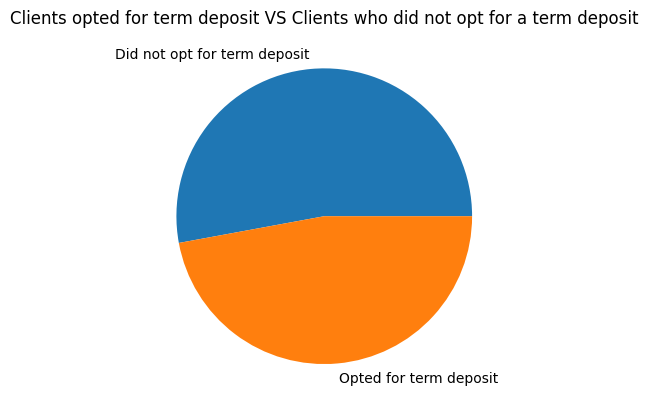

In [3]:
# Finding the responses for term deposits
cnt = data["deposit"].value_counts()
label = ["Did not opt for term deposit","Opted for term deposit"]
plt.pie(cnt,labels=label)
plt.title("Clients opted for term deposit VS Clients who did not opt for a term deposit")

The above pie chart shows that majority of the clients called denied for a term deposit

In [4]:
cnt

0    4428
1    3943
Name: deposit, dtype: int64

# Hence from the above data it is clear that :

1. 3943 clients opted for the term deposit
2. 4428 clients did not opt for the term deposit

<AxesSubplot:xlabel='housing', ylabel='count'>

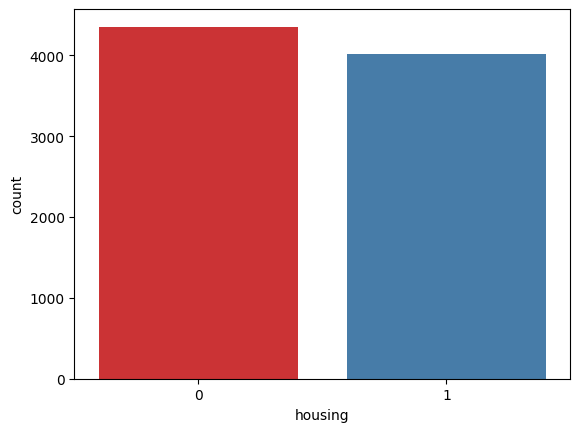

In [5]:
sns.countplot(x="housing",data=data,palette="Set1")

From the above graph, it is clear that around 4000 of the clients are having a house loan and the rest do not have a house loan
where 0 = no
1 = yes

In [6]:
# Calculating how many have house loans
housing_count = data["housing"].value_counts()
housing_count

0    4354
1    4017
Name: housing, dtype: int64

# Hence from the above we have found that : 

1. 4354 clients do not have a house loan
2. 4017 clients do have a house loan

<AxesSubplot:xlabel='loan', ylabel='count'>

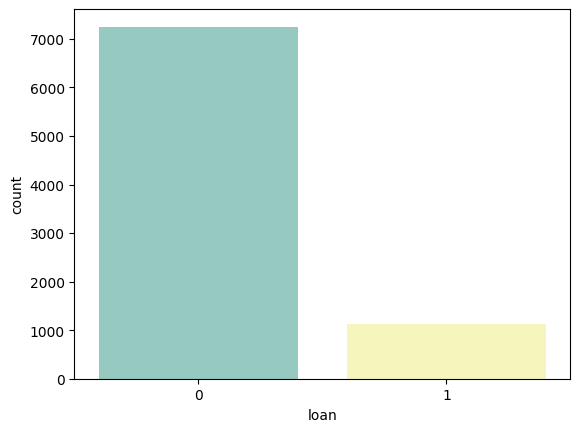

In [7]:
sns.countplot(x="loan",data=data,palette="Set3")

From the above graph we can infer that majority of the clients are not having any personal loan whereas the rest have borrowed for a personal loan

Where 0 = no
      1 = yes

In [8]:
# Calculating how many personal loans
loan_count = data["loan"].value_counts()
loan_count

0    7250
1    1121
Name: loan, dtype: int64

# The above data shows that : 

1. 7250 clients do not have a personal loan
2. 1121 clients have a personal loan

<AxesSubplot:xlabel='default', ylabel='count'>

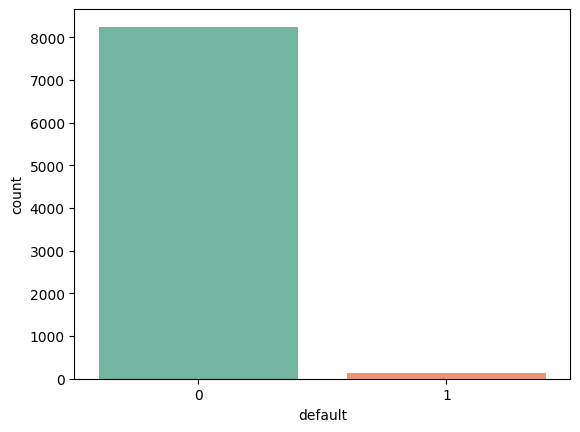

In [9]:
sns.countplot(x="default",data=data,palette="Set2")

The above graph shows the distribution of the defaulters of a loan
where
0 = no
1 = yes

In [10]:
# Calculating the default borrowers count
default_count = data["default"].value_counts()
default_count

0    8244
1     127
Name: default, dtype: int64

# The above data shows that : 

1. 8244 clients are not in defaulters
2. 127 clients are in defaulters

# Hence at prima facie it becomes clear house loan has become an important factor for borrowing the term deposit

# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [12]:
lr = LogisticRegression()
x = data.iloc[:,:-1].values
y = data.iloc[:,16].values

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [15]:
lr.fit(x_train,y_train)

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[718, 181],
       [224, 552]], dtype=int64)

In [18]:
accuracy=(718+552)/(718+181+224+552)
accuracy*100

75.82089552238806

# Calculating Precision, Recall and F1 Scores

In [19]:
# Precision Score

precision = 718 / (718 + 181)
precision

0.7986651835372637

In [21]:
# Recall Score

recall = 718 / (718 + 224)
recall

0.7622080679405521

In [22]:
# F1 Score

f1 = (2 * recall * precision) / (precision + recall)
f1

0.7800108636610538

# Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
print("Decision Tree Test {:.2f}%".format(dtc.score(x_test, y_test)*100))

Decision Tree Test 78.15%


# Random Forest Algorithm

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1300, random_state = 1)
rf.fit(x_train, y_train)
print("Random Forest Algorithm : {:.2f}%".format(rf.score(x_test,y_test)*100))

Random Forest Algorithm : 84.48%


# Hence, we will be using Random forest algorithm as it is having a higher accuracy score

# Now we will be making predictions for the test_data.csv file 

In [26]:
test_data = pd.read_csv(r"C:\\Users\\HP\\Desktop\\ML_Marathon\\test_data.csv")
test_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,31,1,2,1,1,477,0,0,0,20,10,426,2,189,6,0
1,49,1,1,0,0,599,0,0,0,23,6,464,1,-1,0,3
2,51,6,2,2,0,400,0,1,0,27,4,200,1,-1,0,3
3,33,9,1,1,0,488,1,0,2,8,4,703,1,-1,0,3
4,34,0,1,1,0,40,1,0,1,5,4,125,2,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2786,44,4,2,2,1,12,1,0,0,19,10,126,2,-1,0,3
2787,37,4,2,2,0,33,1,0,0,12,2,186,1,-1,0,3
2788,42,0,0,1,0,936,0,0,0,30,0,931,1,-1,0,3
2789,38,8,2,3,0,64,0,0,0,6,7,789,1,-1,0,3


In [33]:
# Predicting the results
y_pred = rf.predict(test_data)
y_pred

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

# Question No. 5

Actually we can use same data for testing and training purposes but we should not. Because we would not be able to predict that whether our model is good. In the below implementation Random Forest and Decision Tree are good but in some datasets it would be the case that we would not be able to predict that other algorithms are actually providing better predictions. As the purpose of testing data is to show us that how will the model perform on an unseen dataset hence it would be incorrect to use the same dataset for testing and training purposes.

In [45]:
lr.fit(x,y)
y_pred = lr.predict(x)
cm = confusion_matrix(y, y_pred)
cm

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[3551,  877],
       [1112, 2831]], dtype=int64)

In [46]:
accuracy = (3551+2831) / (3551+877+2831+1112)
accuracy * 100

76.2393979213953

In [47]:

dtc = DecisionTreeClassifier()
dtc.fit(x, y)
print("Decision Tree Test {:.2f}%".format(dtc.score(x, y)*100))

Decision Tree Test 100.00%


In [48]:

rf = RandomForestClassifier(n_estimators = 1300, random_state = 1)
rf.fit(x, y)
print("Random Forest Algorithm : {:.2f}%".format(rf.score(x,y)*100))

Random Forest Algorithm : 100.00%
